In [1]:
import svgling
from svgling import draw_tree
from svgling.figure import Caption, SideBySide, RowByRow

::: {.content-hidden}

Note! This document in is partly in `quarto`-flavored markdown and can be used with the `quarto` package to generate a rendered version overview. For this reason you will see occasional raw cells and things like the first line of this cell that will render oddly as a plain jupyter notebook.
# `svgling` diagram gallery
:::

This gallery provides several examples of relatively complex SVG tree diagrams rendering using the [`svgling` package](https://github.com/rawlins/svgling). To begin with, here is an example from @Carnie12 that illustrates multiline nodes paired with aligned leaf nodes.

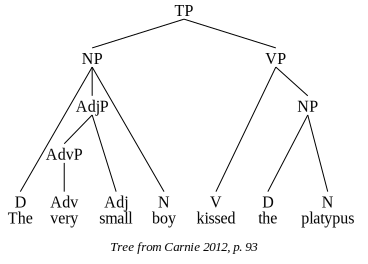

In [2]:
Caption(draw_tree("TP", ("NP", "D\nThe", ("AdjP", ("AdvP", "Adv\nvery"), "Adj\nsmall"), "N\nboy"), ("VP", "V\nkissed", ("NP", "D\nthe", "N\nplatypus")),
                  leaf_nodes_align=True),
        "Tree from Carnie 2012, p. 93")

The following example illustrates Quantifier Raising (QR) in the style of @HeimKratzer98, involving movement arrows, subfigures, and subtree highlighting.

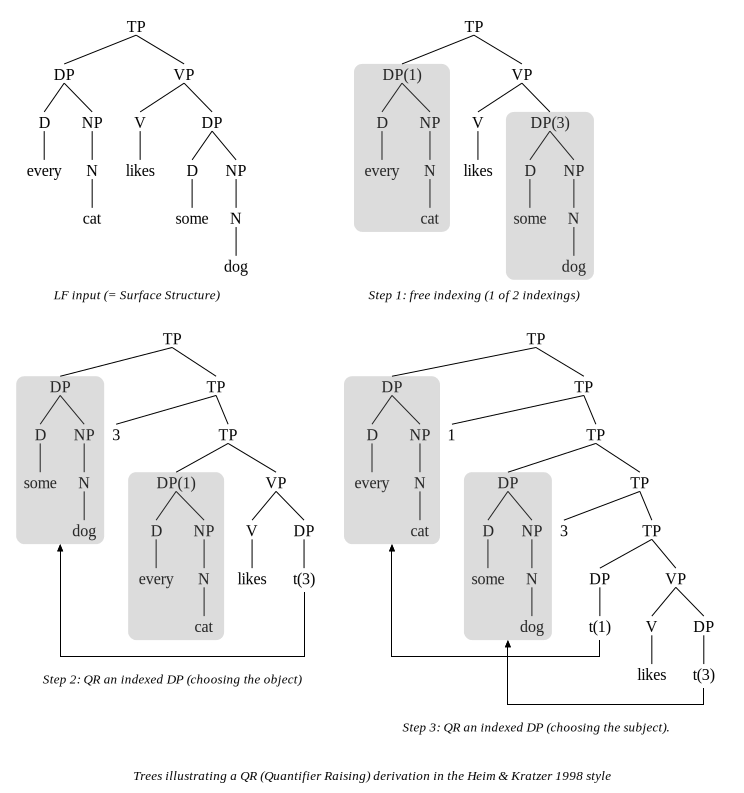

In [3]:
qrtree0 = ("TP", ("DP", ("D", "every"), ("NP", ("N", "cat"))),
                                   ("VP", ("V", "likes"), ("DP", ("D", "some"), ("NP", ("N", "dog")))))
out0 = Caption(draw_tree(qrtree0), "LF input (= Surface Structure)")

qrtree1 = ("TP", ("DP(1)", ("D", "every"), ("NP", ("N", "cat"))),
                                   ("VP", ("V", "likes"), ("DP(3)", ("D", "some"), ("NP", ("N", "dog")))))
out1 = draw_tree(qrtree1)
out1.box_constituent((0,))
out1.box_constituent((1,1))
out1 = Caption(out1, "Step 1: free indexing (1 of 2 indexings)")

qrtree2 = ("TP", ("DP", ("D", "some"), ("NP", ("N", "dog"))),
                      ("TP", "3", ("TP", ("DP(1)", ("D", "every"), ("NP", ("N", "cat"))),
                                   ("VP", ("V", "likes"), ("DP", "t(3)")))))
out2 = draw_tree(qrtree2)
out2.movement_arrow((1,1,1,1), (0,))
out2.box_constituent((0,))
out2.box_constituent((1,1,0))
out2 = Caption(out2, "Step 2: QR an indexed DP (choosing the object)")

qrtree3 = ("TP", ("DP", ("D", "every"), ("NP", ("N", "cat"))),
           ("TP", "1", ("TP", ("DP", ("D", "some"), ("NP", ("N", "dog"))),
                     ("TP", "3", ("TP", ("DP", "t(1)"), ("VP", ("V", "likes"), ("DP", "t(3)")))))))
out3 = draw_tree(qrtree3)
out3.movement_arrow((1,1,1,1,0), (0,))
out3.box_constituent((0,))
out3.movement_arrow((1,1,1,1,1,1), (1,1,0))
out3.box_constituent((1,1,0))
out3 = Caption(out3, "Step 3: QR an indexed DP (choosing the subject).")

Caption(RowByRow(SideBySide(out0, out1), SideBySide(out2,out3)), "Trees illustrating a QR (Quantifier Raising) derivation in the Heim & Kratzer 1998 style")

The following example, based on a tree from @McCloskey00, demonstrates multi-headed movement arrows.

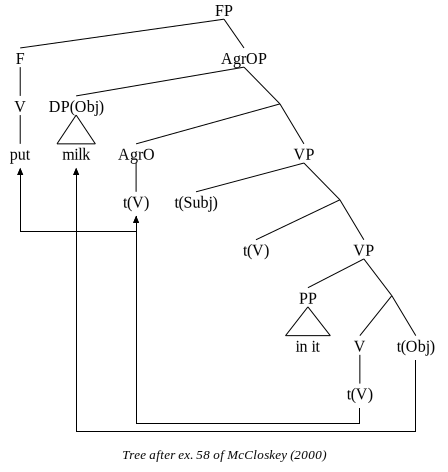

In [4]:
mccloskey = ("FP", ("F", ("V", "put")),
             ("AgrOP", ("DP(Obj)", "milk"),
              ("", ("AgrO", "t(V)"),
               ("VP", "t(Subj)", ("", "t(V)",
                                  ("VP", ("PP", "in it"), ("", ("V", "t(V)"), "t(Obj)")))))))

# TODO: the example in the paper actually uses even horizontal spacing across the whole tree, can I simulate this?
out = draw_tree(mccloskey)
out.set_edge_style((1,0,0), svgling.core.TriangleEdge())
out.set_edge_style((1,1,1,1,1,0,0), svgling.core.TriangleEdge())
out.movement_arrow((1,1,1,1,1,1,0,0), (1,1,0,0))
out.movement_arrow((1,1,0,0), (0,0,0))
out.movement_arrow((1,1,1,1,1,1,1), (1,0))
Caption(out, "Tree after ex. 58 of McCloskey (2000)")

The following tree is not pure SVG, but is rendered using `svgling.html`.

In [5]:
import svgling.html
svgling.html.compat(svgling.html.Compat.USE_MARKDOWN) # needed for quarto
from svgling.html import multiline_text as ml

def math(s):
    # note: we are in markdown mode, so using delimiters with backslashes becomes harder...
    return f"${s}$"

svgling.html.draw_tree(
    ml(math(r"\text{Saw}(\iota x_e{:\:}\text{Elephant}(x),\iota x_e{:\:}\text{Rhino}(x))"), math(r"\text{Type: }t")),
    (ml(math(r"\iota x_e{:\:}\text{Elephant}(x)"), math(r"\text{Type: }e")),
         ml(math(r"\lambda f_{\langle e,t \rangle }{:\:}\iota x_e{:\:}f(x)"),
            math(r"\text{Type: }\langle \langle e,t\rangle ,e\rangle")),
         ml(math(r"\lambda x_e{:\:}\text{Elephant}(x)"), math(r"\text{Type: }\langle e,t\rangle"))),
    (ml(math(r"\lambda x_e{:\:}\text{Saw}(x,\iota x_e{:\:}\text{Rhino}(x))"), math(r"\text{Type: }\langle e,t\rangle")),
         ml(math(r"\lambda y_e{:\:}\lambda x_e{:\:}\text{Saw}(x,y)"),
            math(r"\text{Type: }\langle e,\langle e,t\rangle\rangle")),
         (ml(math(r"\iota x_e{:\:}\text{Rhino}(x)"), math(r"\text{Type: }e")),
              ml(math(r"\lambda f_{\langle e,t \rangle }{:\:}\iota x_e{:\:}f(x)"),
                 math(r"\text{Type: }\langle \langle e,t\rangle ,e\rangle")),
              ml(math(r"\lambda x_e{:\:}\text{Rhino}(x)"), math(r"\text{Type: }\langle e,t\rangle")))))


<div style="display:inline-grid;grid-template-columns: repeat(2, auto);align-items:start;border:none;font-family: times, serif; font-weight: normal; font-style: normal; font-size: 16px;"><div style="grid-row:1;grid-column:1;justify-self:right;width:0;"><div style="display:grid;grid-template-columns:auto;float:right;transform:translate(50%);white-space:nowrap;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Saw}(\iota x_e{:\:}\text{Elephant}(x),\iota x_e{:\:}\text{Rhino}(x))$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }t$</span></div></div></div><div style="grid-row:1;grid-column:1/3;justify-self:center;height:0;overflow:hidden;padding-right:1em;padding-left:1em;"><div style="display:grid;grid-template-columns:auto;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Saw}(\iota x_e{:\:}\text{Elephant}(x),\iota x_e{:\:}\text{Rhino}(x))$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }t$</span></div></div></div><div style="grid-column:1;grid-row:2;justify-self:right;"><div style="display:inline-grid;grid-template-columns: repeat(2, auto);align-items:start;border:none;"><div style="grid-column:2;grid-row:1;height:32px;"><svg baseProfile="tiny" height="0" width="0" preserveAspectRatio="none" version="1.2" viewBox="0,0,100,100" xmlns="http://www.w3.org/2000/svg" style="height:100%;width:100%;display:block;" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><line stroke="black" x1="100" x2="0" y1="2" y2="98" stroke_width="1px" vector-effect="non-scaling-stroke" /></svg></div><div style="grid-row:2;grid-column:1;justify-self:right;width:0;"><div style="display:grid;grid-template-columns:auto;float:right;transform:translate(50%);white-space:nowrap;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\iota x_e{:\:}\text{Elephant}(x)$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }e$</span></div></div></div><div style="grid-row:2;grid-column:1/3;justify-self:center;height:0;overflow:hidden;padding-right:1em;padding-left:1em;"><div style="display:grid;grid-template-columns:auto;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\iota x_e{:\:}\text{Elephant}(x)$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }e$</span></div></div></div><div style="grid-column:1;grid-row:3;justify-self:right;"><div style="display:inline-grid;grid-template-columns: 1fr;align-items:start;border:none;"><div style="grid-column:1;grid-row:1;height:32px;" align="center"><svg baseProfile="tiny" height="0" width="0" preserveAspectRatio="none" version="1.2" viewBox="0,0,100,100" xmlns="http://www.w3.org/2000/svg" style="height:100%;width:100%;display:block;" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><line stroke="black" x1="100" x2="50" y1="2" y2="98" stroke_width="1px" vector-effect="non-scaling-stroke" /></svg></div><div style="grid-column:1;grid-row:2;justify-self:center;"><div style="display:grid;grid-template-columns:auto;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\lambda f_{\langle e,t \rangle }{:\:}\iota x_e{:\:}f(x)$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }\langle \langle e,t\rangle ,e\rangle$</span></div></div></div></div></div><div style="grid-column:2;grid-row:3;"><div style="display:inline-grid;grid-template-columns: 1fr;align-items:start;border:none;"><div style="grid-column:1;grid-row:1;height:32px;" align="center"><svg baseProfile="tiny" height="0" width="0" preserveAspectRatio="none" version="1.2" viewBox="0,0,100,100" xmlns="http://www.w3.org/2000/svg" style="height:100%;width:100%;display:block;" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><line stroke="black" x1="0" x2="50" y1="2" y2="98" stroke_width="1px" vector-effect="non-scaling-stroke" /></svg></div><div style="grid-column:1;grid-row:2;justify-self:center;"><div style="display:grid;grid-template-columns:auto;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\lambda x_e{:\:}\text{Elephant}(x)$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }\langle e,t\rangle$</span></div></div></div></div></div></div></div><div style="grid-column:2;grid-row:2;"><div style="display:inline-grid;grid-template-columns: repeat(2, auto);align-items:start;border:none;"><div style="grid-column:1;grid-row:1;height:32px;"><svg baseProfile="tiny" height="0" width="0" preserveAspectRatio="none" version="1.2" viewBox="0,0,100,100" xmlns="http://www.w3.org/2000/svg" style="height:100%;width:100%;display:block;" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><line stroke="black" x1="0" x2="100" y1="2" y2="98" stroke_width="1px" vector-effect="non-scaling-stroke" /></svg></div><div style="grid-row:2;grid-column:1;justify-self:right;width:0;"><div style="display:grid;grid-template-columns:auto;float:right;transform:translate(50%);white-space:nowrap;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\lambda x_e{:\:}\text{Saw}(x,\iota x_e{:\:}\text{Rhino}(x))$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }\langle e,t\rangle$</span></div></div></div><div style="grid-row:2;grid-column:1/3;justify-self:center;height:0;overflow:hidden;padding-right:1em;padding-left:1em;"><div style="display:grid;grid-template-columns:auto;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\lambda x_e{:\:}\text{Saw}(x,\iota x_e{:\:}\text{Rhino}(x))$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }\langle e,t\rangle$</span></div></div></div><div style="grid-column:1;grid-row:3;justify-self:right;"><div style="display:inline-grid;grid-template-columns: 1fr;align-items:start;border:none;"><div style="grid-column:1;grid-row:1;height:32px;" align="center"><svg baseProfile="tiny" height="0" width="0" preserveAspectRatio="none" version="1.2" viewBox="0,0,100,100" xmlns="http://www.w3.org/2000/svg" style="height:100%;width:100%;display:block;" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><line stroke="black" x1="100" x2="50" y1="2" y2="98" stroke_width="1px" vector-effect="non-scaling-stroke" /></svg></div><div style="grid-column:1;grid-row:2;justify-self:center;"><div style="display:grid;grid-template-columns:auto;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\lambda y_e{:\:}\lambda x_e{:\:}\text{Saw}(x,y)$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }\langle e,\langle e,t\rangle\rangle$</span></div></div></div></div></div><div style="grid-column:2;grid-row:3;"><div style="display:inline-grid;grid-template-columns: repeat(2, auto);align-items:start;border:none;"><div style="grid-column:1;grid-row:1;height:32px;"><svg baseProfile="tiny" height="0" width="0" preserveAspectRatio="none" version="1.2" viewBox="0,0,100,100" xmlns="http://www.w3.org/2000/svg" style="height:100%;width:100%;display:block;" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><line stroke="black" x1="0" x2="100" y1="2" y2="98" stroke_width="1px" vector-effect="non-scaling-stroke" /></svg></div><div style="grid-row:2;grid-column:1;justify-self:right;width:0;"><div style="display:grid;grid-template-columns:auto;float:right;transform:translate(50%);white-space:nowrap;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\iota x_e{:\:}\text{Rhino}(x)$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }e$</span></div></div></div><div style="grid-row:2;grid-column:1/3;justify-self:center;height:0;overflow:hidden;padding-right:1em;padding-left:1em;"><div style="display:grid;grid-template-columns:auto;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\iota x_e{:\:}\text{Rhino}(x)$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }e$</span></div></div></div><div style="grid-column:1;grid-row:3;justify-self:right;"><div style="display:inline-grid;grid-template-columns: 1fr;align-items:start;border:none;"><div style="grid-column:1;grid-row:1;height:32px;" align="center"><svg baseProfile="tiny" height="0" width="0" preserveAspectRatio="none" version="1.2" viewBox="0,0,100,100" xmlns="http://www.w3.org/2000/svg" style="height:100%;width:100%;display:block;" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><line stroke="black" x1="100" x2="50" y1="2" y2="98" stroke_width="1px" vector-effect="non-scaling-stroke" /></svg></div><div style="grid-column:1;grid-row:2;justify-self:center;"><div style="display:grid;grid-template-columns:auto;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\lambda f_{\langle e,t \rangle }{:\:}\iota x_e{:\:}f(x)$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }\langle \langle e,t\rangle ,e\rangle$</span></div></div></div></div></div><div style="grid-column:2;grid-row:3;"><div style="display:inline-grid;grid-template-columns: 1fr;align-items:start;border:none;"><div style="grid-column:1;grid-row:1;height:32px;" align="center"><svg baseProfile="tiny" height="0" width="0" preserveAspectRatio="none" version="1.2" viewBox="0,0,100,100" xmlns="http://www.w3.org/2000/svg" style="height:100%;width:100%;display:block;" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><line stroke="black" x1="0" x2="50" y1="2" y2="98" stroke_width="1px" vector-effect="non-scaling-stroke" /></svg></div><div style="grid-column:1;grid-row:2;justify-self:center;"><div style="display:grid;grid-template-columns:auto;"><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\lambda x_e{:\:}\text{Rhino}(x)$</span></div><div style="padding-left:0.75em;padding-right:0.75em;text-align:center;"><span>$\text{Type: }\langle e,t\rangle$</span></div></div></div></div></div></div></div></div></div></div>

## More diagrams?

I'd be excited to get both new diagram requests, and PRs for new diagrams: [https://github.com/rawlins/svgling](https://github.com/rawlins/svgling).